In [ ]:
#|echo: false
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from fastcore.all import *

## Get data

In [ ]:
#|tbl-cap: Data table
path = Path('../../output')
csv_files = L(path.glob('*.csv')).filter(lambda o: os.stat(o).st_size>0)
pat_store = re.compile('(.+)\_\d+')
pat_date = re.compile('.+\_(\d+)')
df = (
    pd.concat([pd.read_csv(o).assign(store=pat_store.match(o.stem)[1], date=pat_date.match(o.stem)[1])
               for o in csv_files])
    .pipe(lambda df: df.assign(
        name=df.name.str.lower(),
        sku=df.id.where(df.sku.isna(), df.sku).astype(int),
        date=pd.to_datetime(df.date)
    ))
    .drop('id', axis=1)
)
df.sample(3)

,brand,uri,name,price,category,store,date,sku
2082,Genérico,https://www.metro.pe/trucha-deshuesada-x-kg-2-2/p,trucha deshuesada x kg,29.9,https://www.metro.pe/carnes-aves-y-pescados/pe...,metro,2022-11-21,33555
5757,Cuisine & Co,https://www.metro.pe/sal-de-maras-para-cocina-...,sal de maras para cocina cuisine & co 500g,10.5,https://www.metro.pe/abarrotes/condimentos-vin...,metro,2022-09-05,956309
7584,CLEMENTONI,https://www.plazavea.com.pe/amigos-divertidos-...,amigos divertidos para el agua clementoni 17444,119.0,https://www.plazavea.com.pe/bebe-e-infantil,plaza_vea,2022-09-12,10635126


In [ ]:
#|echo: false
#|output: false
names = df.name[df.name.str.contains(r'(?=.*pollo)(?=.*entero).*') &
                ~df.name.str.contains(r'marinado|aderezo')].unique().tolist()
names

['pollo entero light  x kg',
 'pollo entero fresco metro x kg',
 'pollo entero\xa0artisan\xa0libre de antibióticos x kg',
 'pollo entero con menudencia x kg',
 'pollo entero sin menudencia x kg']

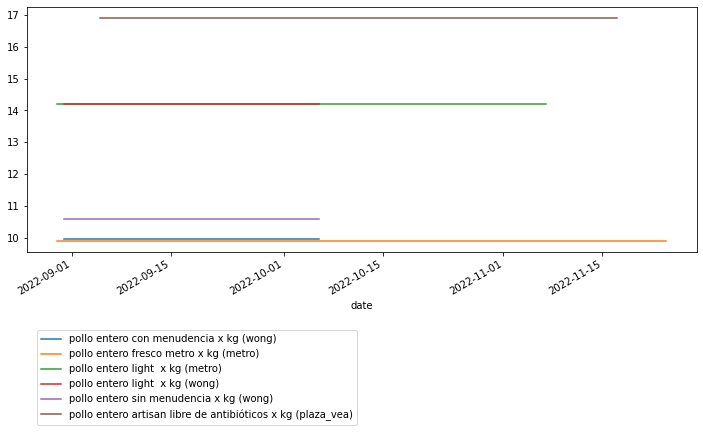

In [ ]:
#|fig-cap: Pollo
fig,ax = plt.subplots(figsize=(12,5))
for n,d in df.loc[df.name.isin(names)].assign(name=lambda d: d.name+' ('+d.store+')').groupby('name'):
    d.plot(x='date', y='price', label=n, ax=ax)
ax.legend(bbox_to_anchor=(0.5,-0.3));

In [ ]:
#|echo: false
#|output: false
names = df.name[df.name.str.contains(r'palta') &
                ~df.name.str.contains(r'shampoo|humectante|vino|salsa|acondicionador|aceite')].unique().tolist()
names

['palta nava metro x kg',
 'palta hass natifrut x kg',
 'palta fuerte metro x kg',
 'palta madura cremosita x kg',
 'palta hass madura la caserita empaque 500g',
 'palta fuerte',
 'palta naval x kg',
 "palta fuerte bell's madura",
 'palta fuerte madura empacada x kg',
 'palta hass orgánica 1kg',
 'palta fuerte verde x kg',
 'palta nava x kg',
 'palta fuerte malla 1kg z',
 'palta hass',
 'crema de tratamiento fructis hair food nutritiva de palta frasco 350ml']

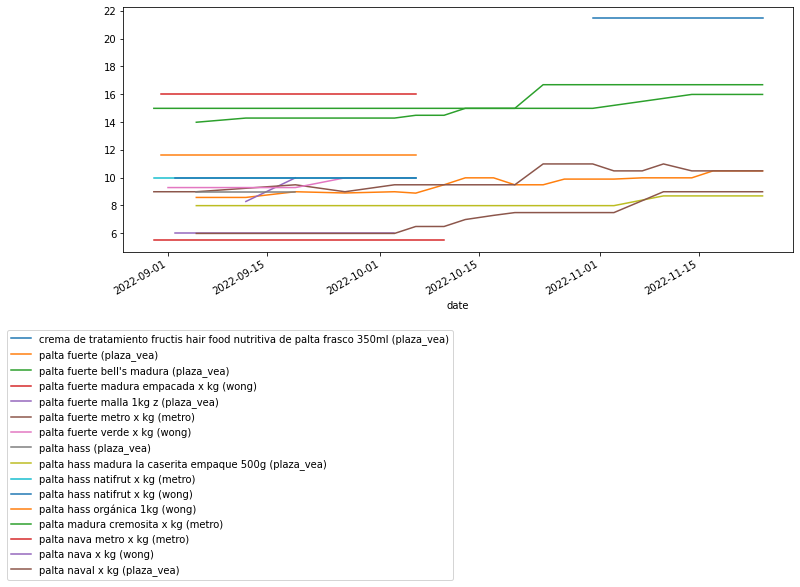

In [ ]:
#|fig-cap: Palta
fig,ax = plt.subplots(figsize=(12,5))
for n,d in df.loc[df.name.isin(names)].assign(name=lambda d: d.name+' ('+d.store+')').groupby('name'):
    d.plot(x='date', y='price', label=n, ax=ax)
ax.legend(bbox_to_anchor=(0.5,-0.3));

In [ ]:
#|echo: false
#|output: false
names = df.name[df.name.str.contains(r'(?=.*aceite)(?=.*vegetal).*') &
                ~df.name.str.contains(r'atun|atún|pack|filete|caballa|tacos|sardinas')].unique().tolist()
names

['aceite vegetal cocinero botella 5 litros',
 'aceite vegetal nicolini 900ml',
 'aceite vegetal primor clásico 1.8l',
 'aceite vegetal metro 900ml',
 'aceite vegetal deleite premium 900ml',
 'aceite vegetal máxima 900ml',
 'aceite vegetal primor clásico 900ml',
 'aceite vegetal cocinero 900ml',
 'aceite vegetal primor corazón 900ml',
 'aceite vegetal primor premium 900ml',
 'aceite vegetal de soya del cielo botella 1l',
 'aceite vegetal primor premium botella 900ml',
 'aceite vegetal primor botella 900ml',
 'aceite vegetal nicolini botella 900ml',
 "aceite vegetal bell's botella 900ml",
 "aceite vegetal bell's botella 900ml paquete x 12un",
 'aceite vegetal cocinero botella 900ml',
 'aceite vegetal mazola canola y girasol spray 142g',
 'aceite vegetal deleite botella 900ml',
 'aceite vegetal primor botella 1.8l',
 'anchoveta en aceite vegetal a1 lata 125g',
 'aceite vegetal del cielo soya bidón 5l',
 'aceite vegetal cil botella 900ml',
 "aceite vegetal bell's galonera 5l",
 'aceite veg

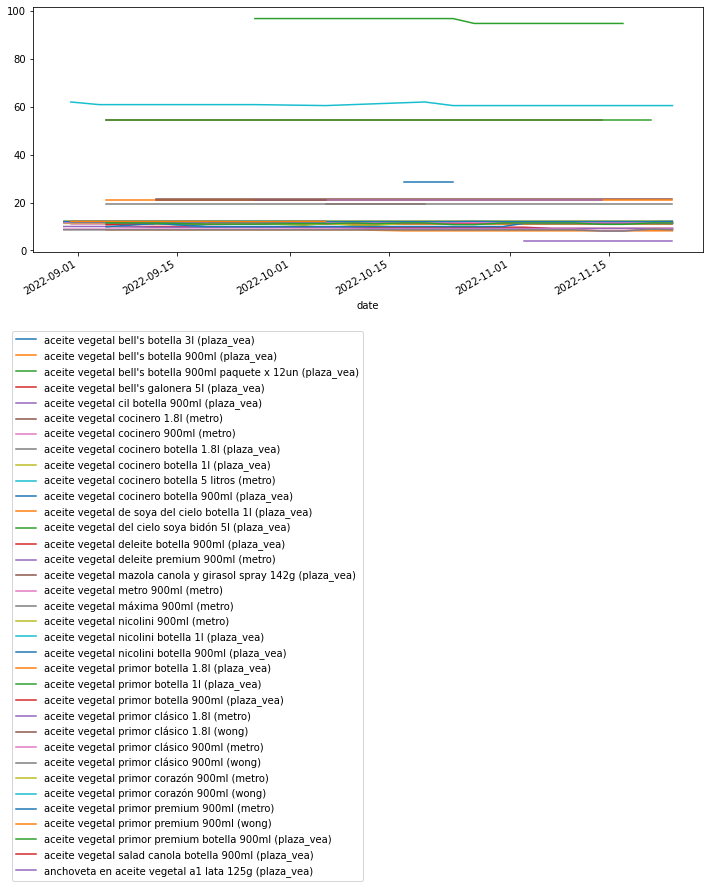

In [ ]:
#|fig-cap: Aceite vegeta
fig,ax = plt.subplots(figsize=(12,5))
for n,d in df.loc[df.name.isin(names)].assign(name=lambda d: d.name+' ('+d.store+')').groupby('name'):
    d.plot(x='date', y='price', label=n, ax=ax)
ax.legend(bbox_to_anchor=(0.5,-0.3));